In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import re
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag, ne_chunk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from summa.summarizer import summarize as summa_summarize
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from collections import Counter
from wordcloud import WordCloud

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\liron firuz\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\liron
[nltk_data]     firuz\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\liron
[nltk_data]     firuz\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
data=pd.read_csv('Data_after_preprocessing.csv')
data

headline  \
0                        1919: The Year of the Crack-Up   
1                         In Search of Lost Screen Time   
2     Warren Wells, Star Receiver With a Derailed Ca...   
3                          2019: The Year of the Wolves   
4                        Why Trump Reigns as King Cyrus   
...                                                 ...   
3916  As Trump Demands His Wall, Lawmakers Plead for...   
3917  U.S. Appears to Soften Timing for List of Nort...   
3918  Dusan Makavejev, 86. Eyebrow-Raising Serbian D...   
3919  A Year Into the Overlooked Project, Widening t...   
3920        The Alarming Allure of Australia’s Brumbies   

                                               abstract  \
0     From the Treaty of Versailles to Prohibition, ...   
1     Imagine what we could do with our money, and h...   
2     Wells was a deep threat for the vaunted Oaklan...   
3         Can the Constitution withstand the partisans?   
4     The Christian right doesn’t like the president...   
...                                                 ...   
3916  Lawmakers reacted with concern and bewildermen...   
3917  A top diplomat said the Trump administration m...   
3918  His films, among them “WR: Mysteries of the Or...   
3919  In the past year, The Times published obituari...   
3920  The environment is being sacrificed for a nati...   

                                         lead paragraph  \
0     Throughout 2019, The New York Times Opinion se...   
1     More than three-quarters of all Americans own ...   
2     Warren Wells, a former wide receiver who becam...   
3     In Willa Cather’s novel “My Antonia,” there ar...   
4     The month before the 2018 midterms, a thousand...   
...                                                 ...   
3916  WASHINGTON — President Trump proclaimed on Thu...   
3917  WASHINGTON — A top American diplomat signaled ...   
3918  Dusan Makavejev, a Serbian director whose movi...   
3919  Times Insider explains who we are and what we ...   
3920  SYDNEY, Australia — Since this country’s found...   

                              first keyword  \
0     United States Politics and Government   
1                               Smartphones   
2                 Wells, Warren (1942-2018)   
3                           Trump, Donald J   
4     United States Politics and Government   
...                                     ...   
3916                        Border Barriers   
3917  United States International Relations   
3918                       Makavejev, Dusan   
3919                        Women and Girls   
3920                       Invasive Species   

                                               keywords   section name  
0     ['United States Politics and Government', 'New...        Opinion  
1                       ['Smartphones', 'Social Media']        Opinion  
2     ['Wells, Warren (1942-2018)', 'Football', 'Dea...     Obituaries  
3     ['Trump, Donald J', 'United States Politics an...        Opinion  
4     ['United States Politics and Government', 'Bib...        Opinion  
...                                                 ...            ...  
3916  ['Border Barriers', 'Trump, Donald J', 'United...           U.S.  
3917  ['United States International Relations', 'ARM...          World  
3918  ['Makavejev, Dusan', 'Deaths (Obituaries)', 'M...     Obituaries  
3919  ['Women and Girls', 'Race and Ethnicity', 'Gor...  Reader Center  
3920        ['Invasive Species', 'Horses', 'Australia']        Opinion  

[3921 rows x 6 columns]

#### KNOWN Y COLUMN

In [32]:
#We are checking whether it is possible to create a text classification model for the Y column using the NLTK method when Y is known(section name)

In [4]:
def preprocess_text(text):
    if isinstance(text, str):
        stemmer = PorterStemmer()
        lemmatizer = WordNetLemmatizer()
        text = text.lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        tokens = word_tokenize(text)
        pos_tags = pos_tag(tokens)
        ner_tags = ne_chunk(pos_tags)
        stop_words = set(stopwords.words('english'))
        filtered_tokens = [word for word, pos in pos_tags if word not in stop_words and (pos.startswith('NN') or pos.startswith('NNP'))]
        stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]
        lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]
        return lemmatized_tokens
    else:
        return ''

data['Text'] = data['headline'].apply(preprocess_text)
data['Text'] = data['Text'].apply(lambda x: ' '.join(x))

X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['section name'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)

#print(classification_report(y_test, y_pred))
accuracy1 = accuracy_score(y_test, y_pred)

In [5]:
data['Text'] = data['abstract'].apply(preprocess_text)
data['Text'] = data['Text'].apply(lambda x: ' '.join(x))

X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['section name'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)

#print(classification_report(y_test, y_pred))
accuracy2 = accuracy_score(y_test, y_pred)

In [6]:
data['Text'] = data['lead paragraph'].apply(preprocess_text)
data['Text'] = data['Text'].apply(lambda x: ' '.join(x))

X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['section name'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)

#print(classification_report(y_test, y_pred))
accuracy3 = accuracy_score(y_test, y_pred)

In [7]:
data['Text'] = data['first keyword'].apply(preprocess_text)
data['Text'] = data['Text'].apply(lambda x: ' '.join(x))

X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['section name'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)

#print(classification_report(y_test, y_pred))
accuracy4 = accuracy_score(y_test, y_pred)

In [8]:
data['Text'] = data['keywords'].apply(preprocess_text)
data['Text'] = data['Text'].apply(lambda x: ' '.join(x))

X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['section name'], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=10000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

y_pred = classifier.predict(X_test_tfidf)

#print(classification_report(y_test, y_pred))
accuracy5 = accuracy_score(y_test, y_pred)

In [9]:
accuracy_table = pd.DataFrame({
    'headline': [accuracy1],
    'abstract': [accuracy2],
    'lead paragraph': [accuracy3],
    'first keyword': [accuracy4],
    'keywords': [accuracy5],
})
accuracy_table

headline  abstract  lead paragraph  first keyword  keywords
0  0.340127  0.321019        0.398726       0.463694  0.481529

In [33]:
# It can be seen that keywords & first keyword has a better accuracy result in prediction. 

#### WITHOUT Y COULMN

In [11]:
#We will try to examine whether it is possible to create a text classification model according to NLTK without the Y column

In [12]:
data['Text'] = data['headline'].apply(preprocess_text)

dictionary = Dictionary(data['Text'])
dictionary.filter_extremes(no_below=20, no_above=0.5, keep_n=10000)
corpus = [dictionary.doc2bow(text) for text in data['Text']]

num_topics = 40
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)

headline_topics = lda_model.show_topics(num_topics=num_topics, num_words=30)
#for topic_idx, topic in headline_topics:
#    print(f"Topic {topic_idx + 1}:")
#    print(topic)
#    print()


coherence_model_lda = CoherenceModel(model=lda_model, texts=data['Text'], dictionary=dictionary, coherence='c_v')
coherence_lda1 = coherence_model_lda.get_coherence()
#print(f'Coherence Score: {coherence_lda1}')


In [13]:
data['Text'] = data['abstract'].apply(preprocess_text)

dictionary = Dictionary(data['Text'])
dictionary.filter_extremes(no_below=20, no_above=0.5, keep_n=10000)
corpus = [dictionary.doc2bow(text) for text in data['Text']]

num_topics = 40
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)

abstract_topics = lda_model.show_topics(num_topics=num_topics, num_words=30)
#for topic_idx, topic in abstract_topics:
#    print(f"Topic {topic_idx + 1}:")
#    print(topic)
#    print()


coherence_model_lda = CoherenceModel(model=lda_model, texts=data['Text'], dictionary=dictionary, coherence='c_v')
coherence_lda2 = coherence_model_lda.get_coherence()
#print(f'Coherence Score: {coherence_lda1}')


In [14]:
data['Text'] = data['lead paragraph'].apply(preprocess_text)

dictionary = Dictionary(data['Text'])
dictionary.filter_extremes(no_below=20, no_above=0.5, keep_n=10000)
corpus = [dictionary.doc2bow(text) for text in data['Text']]

num_topics = 40
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)

lead_paragraph_topics = lda_model.show_topics(num_topics=num_topics, num_words=30)
#for topic_idx, topic in lead_paragraph_topics:
#    print(f"Topic {topic_idx + 1}:")
#    print(topic)
#    print()


coherence_model_lda = CoherenceModel(model=lda_model, texts=data['Text'], dictionary=dictionary, coherence='c_v')
coherence_lda3 = coherence_model_lda.get_coherence()
#print(f'Coherence Score: {coherence_lda1}')

In [15]:
data['Text'] = data['first keyword'].astype(str).apply(preprocess_text)

dictionary = Dictionary(data['Text'])
dictionary.filter_extremes(no_below=20, no_above=0.5, keep_n=10000)
corpus = [dictionary.doc2bow(text) for text in data['Text']]

num_topics = 40
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)

first_keyword_topics = lda_model.show_topics(num_topics=num_topics, num_words=30)
#for topic_idx, topic in first_keyword_topics:
#    print(f"Topic {topic_idx + 1}:")
#    print(topic)
#    print()


coherence_model_lda = CoherenceModel(model=lda_model, texts=data['Text'], dictionary=dictionary, coherence='c_v')
coherence_lda4 = coherence_model_lda.get_coherence()
#print(f'Coherence Score: {coherence_lda1}')

In [16]:
data['Text'] = data['keywords'].astype(str).apply(preprocess_text)

dictionary = Dictionary(data['Text'])
dictionary.filter_extremes(no_below=20, no_above=0.5, keep_n=10000)
corpus = [dictionary.doc2bow(text) for text in data['Text']]

num_topics = 40
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42)

keywords_topics = lda_model.show_topics(num_topics=num_topics, num_words=30)
#for topic_idx, topic in keywords_topics:
#    print(f"Topic {topic_idx + 1}:")
#    print(topic)
#    print()


coherence_model_lda = CoherenceModel(model=lda_model, texts=data['Text'], dictionary=dictionary, coherence='c_v')
coherence_lda5 = coherence_model_lda.get_coherence()
#print(f'Coherence Score: {coherence_lda1}')

In [17]:
Coherence_Score_table = pd.DataFrame({
    'headline': [coherence_lda1],
    'abstract': [coherence_lda2],
    'lead paragraph': [coherence_lda3],
    'first keyword': [coherence_lda4],
    'keywords': [coherence_lda5],
})


In [18]:
Coherence_Score_table

headline  abstract  lead paragraph  first keyword  keywords
0  0.611732   0.39544        0.308748         0.7395  0.413015

In [19]:
#It seems that the results of headline and first keyword are the highest.
#According to this approach classification by the first keyword is the model with the highest level of Coherence.

In [34]:
#important note -We tested several subject sizes up to a size of 80 subjects. There is no substantial change in the coherence score. 
#We chose to go for 40 topics - close to the column section name.

In [35]:
#to get a better understanding about the topics that was made, let do word cloud to first keyword and headline

Words extracted for Category 0: ['j', 'trump', 'donald', 'york', 'rock', 'pop', 'music', 'time', 'govern', 'book', 'polit', 'state', 'citi', 'literatur', 'cook', 'associ', 'interfer', 'brexit', 'withdraw', 'restaur', 'footbal', 'inc', 'britain', 'basebal', 'art', 'elect', 'cookbook', 'crossword', 'relat', 'basketbal']


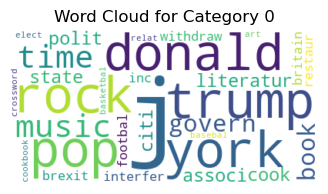

Words extracted for Category 1: ['residenti', 'hous', 'estat', 'york', 'time', 'trump', 'state', 'donald', 'j', 'withdraw', 'music', 'pop', 'rock', 'britain', 'polit', 'literatur', 'brexit', 'govern', 'book', 'economi', 'restaur', 'televis', 'relat', 'woman', 'girl', 'puzzl', 'art', 'associ', 'footbal', 'interfer']


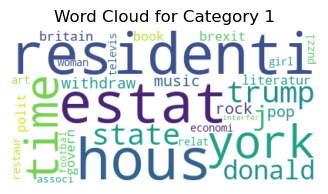

Words extracted for Category 2: ['elect', 'inc', 'york', 'literatur', 'book', 'state', 'associ', 'govern', 'polit', 'crossword', 'interfer', 'citi', 'tie', 'puzzl', 'hous', 'time', 'basebal', 'britain', 'shutdown', 'relat', 'music', 'pop', 'rock', 'j', 'economi', 'donald', 'withdraw', 'woman', 'basketbal', 'brexit']


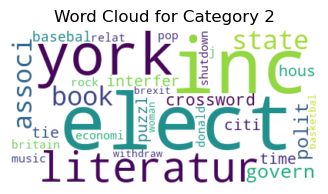

Words extracted for Category 3: ['state', 'economi', 'polit', 'govern', 'j', 'donald', 'trump', 'relat', 'china', 'art', 'inc', 'cookbook', 'citi', 'shutdown', 'elect', 'york', 'cook', 'basebal', 'pop', 'music', 'puzzl', 'rock', 'basketbal', 'restaur', 'brexit', 'withdraw', 'associ', 'interfer', 'britain', 'woman']


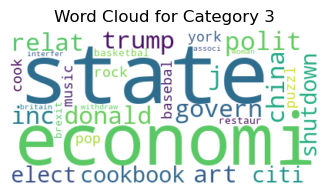

Words extracted for Category 4: ['shutdown', 'britain', 'brexit', 'withdraw', 'interfer', 'tie', 'elect', 'associ', 'residenti', 'estat', 'hous', 'theater', 'cook', 'govern', 'cookbook', 'immigr', 'citi', 'china', 'basebal', 'art', 'j', 'relat', 'music', 'pop', 'rock', 'economi', 'basketbal', 'restaur', 'inc', 'footbal']


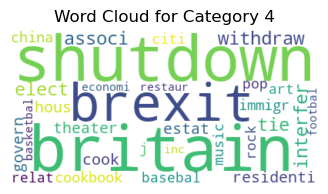

Words extracted for Category 5: ['state', 'relat', 'polit', 'govern', 'defens', 'forc', 'travel', 'vacat', 'basebal', 'art', 'inc', 'elect', 'shutdown', 'citi', 'york', 'cook', 'cookbook', 'britain', 'music', 'pop', 'rock', 'economi', 'basketbal', 'restaur', 'brexit', 'withdraw', 'associ', 'interfer', 'china', 'trump']


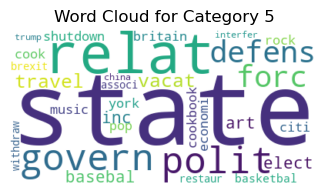

Words extracted for Category 6: ['music', 'rock', 'pop', 'residenti', 'hous', 'vacat', 'estat', 'travel', 'china', 'cookbook', 'cook', 'shutdown', 'citi', 'elect', 'govern', 'inc', 'art', 'basebal', 'britain', 'relat', 'economi', 'basketbal', 'restaur', 'brexit', 'withdraw', 'associ', 'interfer', 'york', 'j', 'footbal']


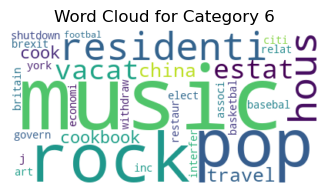

Words extracted for Category 7: ['donald', 'trump', 'cook', 'cookbook', 'j', 'state', 'estat', 'govern', 'hous', 'residenti', 'polit', 'economi', 'china', 'art', 'basebal', 'britain', 'shutdown', 'inc', 'citi', 'pop', 'music', 'rock', 'basketbal', 'restaur', 'brexit', 'withdraw', 'associ', 'interfer', 'relat', 'york']


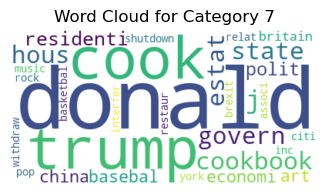

Words extracted for Category 8: ['movi', 'brexit', 'donald', 'britain', 'withdraw', 'j', 'trump', 'defens', 'forc', 'citi', 'art', 'shutdown', 'cook', 'cookbook', 'inc', 'govern', 'elect', 'music', 'relat', 'china', 'pop', 'rock', 'economi', 'basketbal', 'restaur', 'associ', 'interfer', 'york', 'basebal', 'crossword']


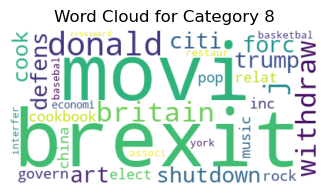

Words extracted for Category 9: ['immigr', 'interfer', 'tie', 'associ', 'elect', 'j', 'donald', 'trump', 'cookbook', 'cook', 'shutdown', 'govern', 'china', 'inc', 'televis', 'citi', 'art', 'music', 'britain', 'relat', 'book', 'pop', 'rock', 'economi', 'basketbal', 'restaur', 'brexit', 'withdraw', 'basebal', 'girl']


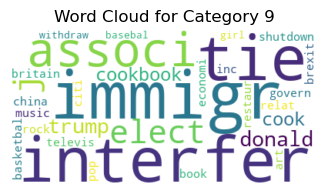

Words extracted for Category 10: ['inc', 'hous', 'residenti', 'estat', 'woman', 'book', 'literatur', 'relat', 'citi', 'state', 'girl', 'york', 'immigr', 'cookbook', 'britain', 'cook', 'art', 'basebal', 'rock', 'pop', 'shutdown', 'economi', 'basketbal', 'restaur', 'brexit', 'withdraw', 'associ', 'interfer', 'music', 'govern']


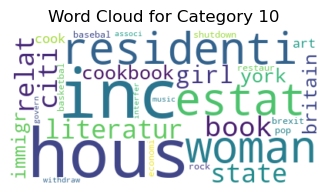

Words extracted for Category 11: ['televis', 'donald', 'trump', 'j', 'crossword', 'puzzl', 'withdraw', 'britain', 'brexit', 'basebal', 'citi', 'govern', 'cook', 'cookbook', 'inc', 'art', 'shutdown', 'elect', 'economi', 'music', 'pop', 'rock', 'china', 'basketbal', 'restaur', 'associ', 'interfer', 'york', 'relat', 'girl']


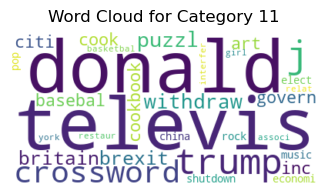

Words extracted for Category 12: ['j', 'donald', 'trump', 'book', 'literatur', 'china', 'basebal', 'art', 'inc', 'cook', 'britain', 'shutdown', 'citi', 'elect', 'govern', 'cookbook', 'relat', 'rock', 'pop', 'crossword', 'economi', 'basketbal', 'restaur', 'brexit', 'withdraw', 'associ', 'interfer', 'york', 'music', 'girl']


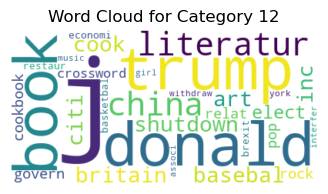

Words extracted for Category 13: ['polit', 'govern', 'state', 'hous', 'residenti', 'economi', 'estat', 'defens', 'york', 'cook', 'forc', 'relat', 'cookbook', 'britain', 'art', 'inc', 'music', 'basebal', 'pop', 'brexit', 'donald', 'basketbal', 'restaur', 'withdraw', 'associ', 'interfer', 'elect', 'shutdown', 'rock', 'girl']


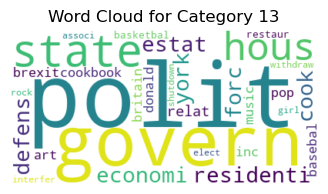

Words extracted for Category 14: ['state', 'rock', 'polit', 'music', 'pop', 'govern', 'defens', 'girl', 'forc', 'woman', 'cookbook', 'cook', 'shutdown', 'citi', 'york', 'inc', 'art', 'elect', 'britain', 'relat', 'china', 'economi', 'basketbal', 'restaur', 'brexit', 'withdraw', 'associ', 'interfer', 'basebal', 'trump']


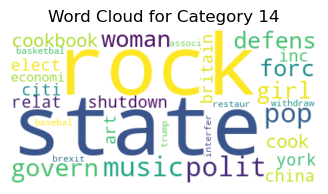

Words extracted for Category 15: ['literatur', 'book', 'economi', 'music', 'pop', 'rock', 'state', 'polit', 'govern', 'cookbook', 'cook', 'shutdown', 'citi', 'elect', 'york', 'immigr', 'inc', 'art', 'china', 'britain', 'relat', 'trump', 'basketbal', 'restaur', 'brexit', 'withdraw', 'associ', 'interfer', 'basebal', 'crossword']


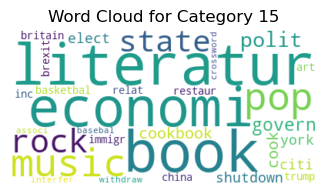

Words extracted for Category 16: ['j', 'trump', 'donald', 'immigr', 'televis', 'govern', 'china', 'elect', 'citi', 'shutdown', 'cook', 'cookbook', 'inc', 'art', 'basebal', 'britain', 'music', 'book', 'pop', 'rock', 'economi', 'basketbal', 'restaur', 'brexit', 'withdraw', 'associ', 'interfer', 'york', 'relat', 'girl']


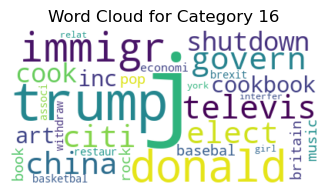

Words extracted for Category 17: ['crossword', 'puzzl', 'york', 'girl', 'forc', 'cookbook', 'govern', 'woman', 'cook', 'polit', 'time', 'defens', 'citi', 'interfer', 'inc', 'art', 'basebal', 'britain', 'relat', 'music', 'pop', 'rock', 'economi', 'basketbal', 'state', 'brexit', 'withdraw', 'associ', 'china', 'restaur']


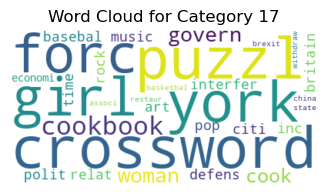

Words extracted for Category 18: ['citi', 'york', 'travel', 'vacat', 'brexit', 'withdraw', 'literatur', 'cookbook', 'britain', 'book', 'cook', 'art', 'china', 'elect', 'govern', 'immigr', 'inc', 'shutdown', 'relat', 'j', 'music', 'pop', 'rock', 'economi', 'basketbal', 'restaur', 'associ', 'interfer', 'basebal', 'footbal']


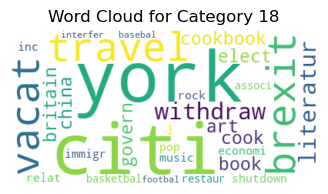

Words extracted for Category 19: ['state', 'govern', 'polit', 'donald', 'trump', 'j', 'time', 'economi', 'york', 'relat', 'cook', 'cookbook', 'inc', 'art', 'basebal', 'britain', 'music', 'pop', 'brexit', 'footbal', 'basketbal', 'restaur', 'shutdown', 'withdraw', 'associ', 'interfer', 'elect', 'citi', 'rock', 'girl']


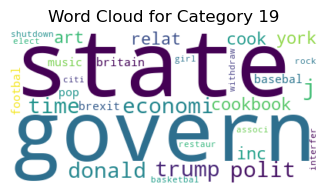

Words extracted for Category 20: ['trump', 'donald', 'j', 'withdraw', 'britain', 'literatur', 'brexit', 'book', 'govern', 'polit', 'crossword', 'puzzl', 'state', 'citi', 'basebal', 'art', 'cookbook', 'cook', 'inc', 'relat', 'restaur', 'pop', 'rock', 'economi', 'basketbal', 'shutdown', 'associ', 'interfer', 'music', 'york']


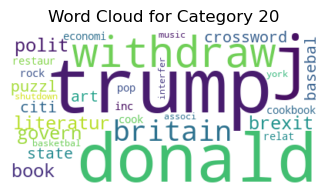

Words extracted for Category 21: ['restaur', 'residenti', 'hous', 'estat', 'puzzl', 'crossword', 'associ', 'j', 'tie', 'trump', 'elect', 'interfer', 'donald', 'cookbook', 'inc', 'art', 'basebal', 'britain', 'cook', 'shutdown', 'rock', 'music', 'pop', 'citi', 'economi', 'basketbal', 'brexit', 'withdraw', 'relat', 'govern']


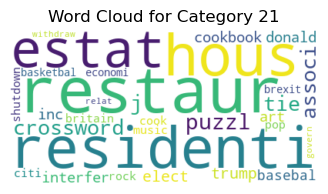

Words extracted for Category 22: ['govern', 'polit', 'state', 'book', 'literatur', 'cookbook', 'time', 'cook', 'york', 'j', 'donald', 'inc', 'art', 'basebal', 'britain', 'relat', 'music', 'pop', 'brexit', 'economi', 'basketbal', 'restaur', 'shutdown', 'withdraw', 'associ', 'interfer', 'elect', 'citi', 'rock', 'girl']


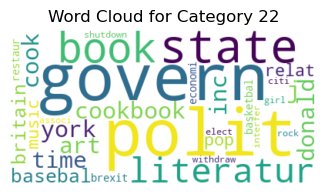

Words extracted for Category 23: ['york', 'state', 'time', 'citi', 'book', 'polit', 'literatur', 'china', 'govern', 'elect', 'shutdown', 'cook', 'cookbook', 'inc', 'art', 'basebal', 'music', 'relat', 'trump', 'pop', 'rock', 'economi', 'basketbal', 'restaur', 'brexit', 'withdraw', 'associ', 'interfer', 'britain', 'crossword']


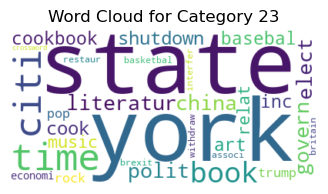

Words extracted for Category 24: ['govern', 'polit', 'state', 'trump', 'j', 'donald', 'girl', 'woman', 'shutdown', 'elect', 'basebal', 'art', 'inc', 'cook', 'britain', 'citi', 'cookbook', 'relat', 'economi', 'pop', 'rock', 'york', 'basketbal', 'restaur', 'brexit', 'withdraw', 'associ', 'interfer', 'music', 'puzzl']


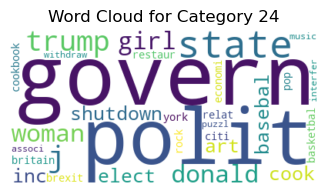

Words extracted for Category 25: ['theater', 'puzzl', 'crossword', 'citi', 'york', 'immigr', 'woman', 'govern', 'china', 'elect', 'shutdown', 'cook', 'cookbook', 'inc', 'art', 'basebal', 'relat', 'televis', 'music', 'pop', 'rock', 'economi', 'basketbal', 'restaur', 'brexit', 'withdraw', 'associ', 'interfer', 'britain', 'footbal']


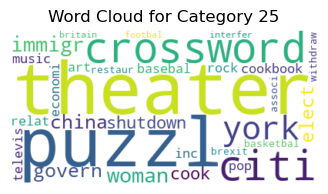

Words extracted for Category 26: ['literatur', 'book', 'polit', 'govern', 'tie', 'interfer', 'trump', 'elect', 'residenti', 'hous', 'j', 'state', 'associ', 'donald', 'estat', 'inc', 'art', 'basebal', 'withdraw', 'britain', 'relat', 'music', 'pop', 'brexit', 'cook', 'rock', 'economi', 'cookbook', 'restaur', 'basketbal']


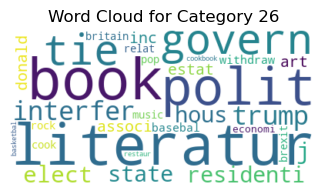

Words extracted for Category 27: ['cook', 'cookbook', 'vacat', 'travel', 'literatur', 'book', 'china', 'immigr', 'govern', 'elect', 'citi', 'shutdown', 'inc', 'art', 'basebal', 'britain', 'relat', 'music', 'pop', 'rock', 'economi', 'basketbal', 'restaur', 'brexit', 'withdraw', 'associ', 'interfer', 'york', 'j', 'footbal']


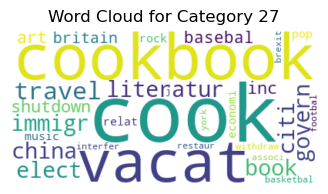

Words extracted for Category 28: ['hous', 'estat', 'residenti', 'j', 'donald', 'citi', 'trump', 'york', 'restaur', 'basketbal', 'basebal', 'art', 'elect', 'cookbook', 'shutdown', 'govern', 'inc', 'cook', 'music', 'relat', 'china', 'pop', 'rock', 'economi', 'brexit', 'withdraw', 'associ', 'interfer', 'britain', 'crossword']


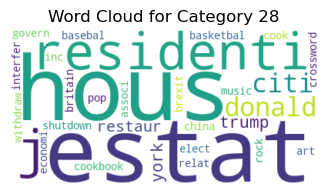

Words extracted for Category 29: ['woman', 'footbal', 'girl', 'immigr', 'televis', 'govern', 'china', 'elect', 'citi', 'shutdown', 'cook', 'cookbook', 'inc', 'art', 'basebal', 'britain', 'music', 'book', 'pop', 'rock', 'economi', 'basketbal', 'restaur', 'brexit', 'withdraw', 'associ', 'interfer', 'york', 'relat', 'crossword']


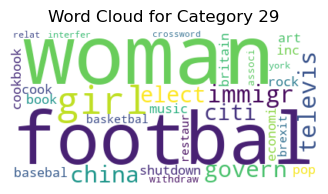

Words extracted for Category 30: ['time', 'york', 'relat', 'hous', 'j', 'residenti', 'donald', 'estat', 'state', 'trump', 'britain', 'basebal', 'citi', 'inc', 'cook', 'shutdown', 'art', 'cookbook', 'pop', 'govern', 'rock', 'economi', 'basketbal', 'restaur', 'brexit', 'withdraw', 'associ', 'interfer', 'music', 'elect']


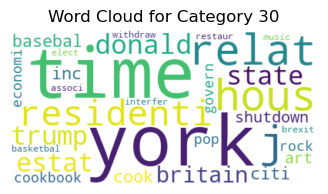

Words extracted for Category 31: ['literatur', 'book', 'j', 'trump', 'donald', 'woman', 'girl', 'polit', 'state', 'govern', 'britain', 'basebal', 'art', 'citi', 'inc', 'cookbook', 'cook', 'relat', 'music', 'restaur', 'rock', 'economi', 'basketbal', 'shutdown', 'brexit', 'withdraw', 'associ', 'interfer', 'pop', 'york']


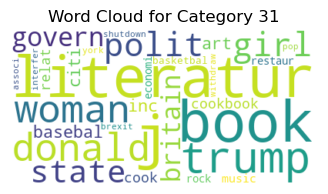

Words extracted for Category 32: ['cookbook', 'cook', 'state', 'govern', 'polit', 'brexit', 'withdraw', 'britain', 'travel', 'vacat', 'relat', 'art', 'citi', 'shutdown', 'york', 'immigr', 'inc', 'elect', 'china', 'trump', 'music', 'pop', 'rock', 'economi', 'basketbal', 'restaur', 'associ', 'interfer', 'basebal', 'crossword']


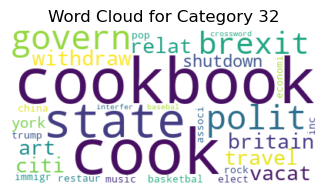

Words extracted for Category 33: ['state', 'polit', 'govern', 'associ', 'forc', 'interfer', 'elect', 'book', 'economi', 'defens', 'literatur', 'tie', 'art', 'basebal', 'britain', 'relat', 'music', 'pop', 'rock', 'trump', 'donald', 'restaur', 'brexit', 'withdraw', 'j', 'inc', 'citi', 'cook', 'basketbal', 'cookbook']


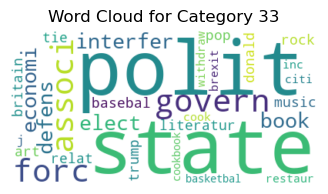

Words extracted for Category 34: ['travel', 'defens', 'vacat', 'forc', 'polit', 'govern', 'state', 'withdraw', 'britain', 'brexit', 'shutdown', 'york', 'cook', 'cookbook', 'inc', 'art', 'citi', 'elect', 'china', 'relat', 'music', 'pop', 'rock', 'economi', 'basketbal', 'restaur', 'associ', 'interfer', 'basebal', 'trump']


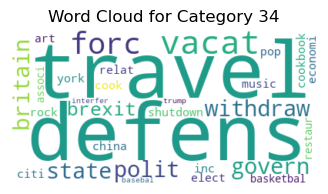

Words extracted for Category 35: ['girl', 'woman', 'govern', 'polit', 'state', 'interfer', 'associ', 'elect', 'tie', 'withdraw', 'brexit', 'britain', 'puzzl', 'crossword', 'vacat', 'travel', 'inc', 'art', 'basebal', 'relat', 'music', 'donald', 'economi', 'basketbal', 'restaur', 'cookbook', 'cook', 'j', 'pop', 'rock']


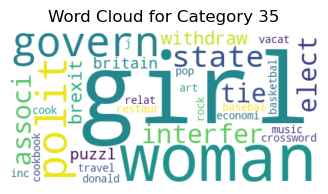

Words extracted for Category 36: ['forc', 'defens', 'music', 'brexit', 'withdraw', 'rock', 'puzzl', 'pop', 'britain', 'economi', 'citi', 'crossword', 'york', 'state', 'govern', 'elect', 'shutdown', 'cook', 'cookbook', 'china', 'art', 'basebal', 'relat', 'trump', 'basketbal', 'restaur', 'associ', 'interfer', 'inc', 'girl']


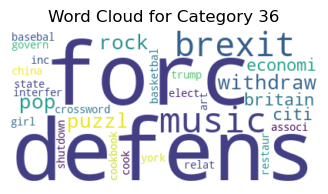

Words extracted for Category 37: ['book', 'literatur', 'puzzl', 'crossword', 'art', 'china', 'immigr', 'govern', 'elect', 'citi', 'shutdown', 'cook', 'cookbook', 'inc', 'basebal', 'britain', 'pop', 'music', 'j', 'rock', 'economi', 'basketbal', 'restaur', 'brexit', 'withdraw', 'associ', 'interfer', 'york', 'relat', 'footbal']


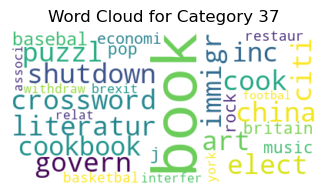

Words extracted for Category 38: ['nan', 'polit', 'govern', 'state', 'literatur', 'book', 'j', 'trump', 'donald', 'forc', 'defens', 'vacat', 'travel', 'footbal', 'britain', 'restaur', 'rock', 'associ', 'interfer', 'brexit', 'withdraw', 'pop', 'basebal', 'music', 'economi', 'inc', 'art', 'relat', 'cook', 'basketbal']


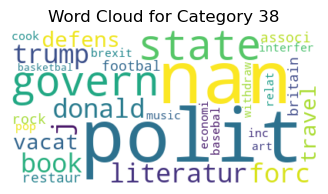

Words extracted for Category 39: ['book', 'literatur', 'york', 'time', 'estat', 'hous', 'residenti', 'elect', 'govern', 'citi', 'shutdown', 'cook', 'cookbook', 'inc', 'art', 'basebal', 'relat', 'china', 'music', 'pop', 'rock', 'economi', 'basketbal', 'restaur', 'brexit', 'withdraw', 'associ', 'interfer', 'britain', 'j']


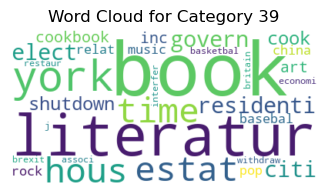

In [22]:
for category, keyword_string in first_keyword_topics:
    words = []

    matches = re.findall(r'"\w+"', keyword_string)
    for match in matches:
        word = match.strip('"')
        words.append(word)

    text = ' '.join(words)

    if words:
        print(f"Words extracted for Category {category}: {words}")
        
        wordcloud = WordCloud(width=400, height=200, background_color='white').generate(text)
        plt.figure(figsize=(4, 2))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for Category {category}')
        plt.axis('off')
        plt.show()
    else:
        print(f"No words extracted for Category {category}.")


Words extracted for Category 0: ['histori', 'trump', 'china', 'deal', 'wall', 'border', 'trade', 'brexit', 'oscar', 'offic', 'brief', 'shutdown', 'democrat', 'life', 'worker', 'death', 'tv', 'year', 'way', 'world', 'hous', 'film', 'globe', 'art', 'power', 'crisi', 'work', 'immigr']


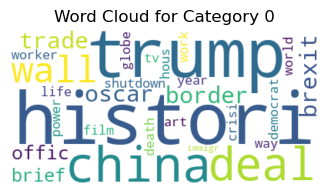

Words extracted for Category 1: ['plan', 'trump', 'presid', 'brexit', 'today', 'world', 'war', 'brief', 'quiz', 'word', 'even', 'thing', 'nyc', 'report', 'weekend', 'health', 'market', 'job', 'talk', 'govern', 'trade', 'case', 'work', 'globe', 'life', 'bill', 'film', 'crisi', 'art']


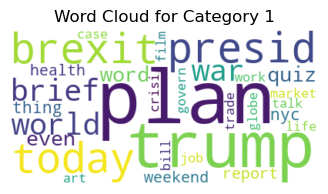

Words extracted for Category 2: ['brexit', 'report', 'trump', 'weekend', 'crisi', 'offici', 'peopl', 'syria', 'nyc', 'leader', 'music', 'wall', 'show', 'shutdown', 'school', 'even', 'attack', 'thing', 'man', 'offic', 'brief', 'bill', 'globe', 'world', 'work', 'power', 'job', 'venezuela', 'life']


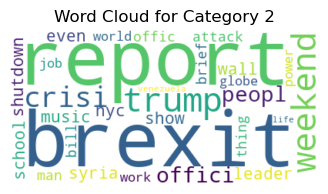

Words extracted for Category 3: ['music', 'way', 'weekend', 'nyc', 'time', 'shutdown', 'trump', 'health', 'govern', 'citi', 'offic', 'wall', 'court', 'york', 'stori', 'worker', 'peopl', 'art', 'crisi', 'life', 'globe', 'work', 'power', 'world', 'film', 'job', 'offici', 'bill', 'market']


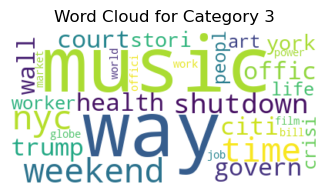

Words extracted for Category 4: ['season', 'book', 'woman', 'word', 'hous', 'border', 'quiz', 'weekend', 'york', 'wall', 'famili', 'place', 'way', 'nyc', 'die', 'music', 'polic', 'week', 'market', 'year', 'power', 'film', 'globe', 'world', 'crisi', 'work', 'bill', 'art']


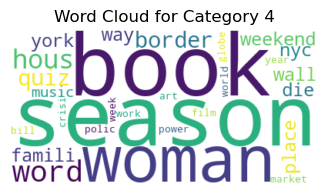

Words extracted for Category 5: ['venezuela', 'shutdown', 'govern', 'bill', 'crisi', 'histori', 'trump', 'quiz', 'word', 'woman', 'report', 'nyc', 'market', 'student', 'art', 'case', 'power', 'globe', 'work', 'world', 'day', 'film', 'wall', 'job', 'news', 'weekend', 'offici', 'charg', 'life', 'winter']


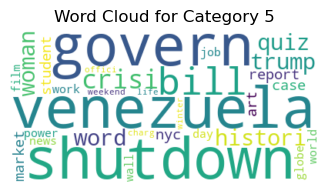

Words extracted for Category 6: ['brief', 'famili', 'even', 'brexit', 'china', 'state', 'oscar', 'presid', 'child', 'week', 'year', 'plan', 'place', 'die', 'star', 'thing', 'time', 'russia', 'york', 'life', 'power', 'film', 'market', 'world', 'bill', 'crisi', 'globe', 'art']


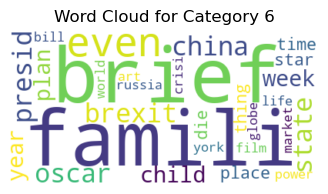

Words extracted for Category 7: ['market', 'democrat', 'john', 'trump', 'star', 'season', 'time', 'wall', 'quiz', 'york', 'citi', 'leader', 'border', 'govern', 'woman', 'trade', 'crisi', 'work', 'report', 'war', 'shutdown', 'plan', 'presid', 'offici', 'life', 'state', 'famili', 'power']


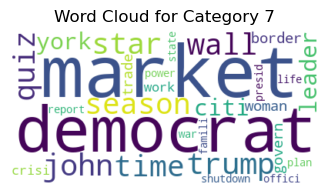

Words extracted for Category 8: ['weekend', 'film', 'nyc', 'democrat', 'thing', 'trump', 'citi', 'star', 'review', 'govern', 'die', 'talk', 'attack', 'york', 'death', 'child', 'day', 'right', 'globe', 'power', 'art', 'crisi', 'bill', 'work', 'life', 'world', 'market', 'court']


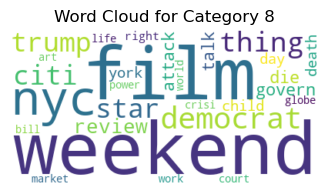

Words extracted for Category 9: ['state', 'protest', 'report', 'polic', 'health', 'war', 'offici', 'attack', 'time', 'famili', 'year', 'power', 'wall', 'woman', 'govern', 'shutdown', 'venezuela', 'job', 'weekend', 'crisi', 'life', 'brexit', 'book', 'globe', 'world', 'student', 'art', 'work', 'film']


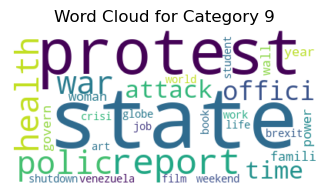

Words extracted for Category 10: ['review', 'syria', 'right', 'trump', 'job', 'wall', 'border', 'weekend', 'student', 'book', 'democrat', 'day', 'market', 'week', 'power', 'art', 'offici', 'crisi', 'report', 'globe', 'work', 'news', 'life', 'world', 'film', 'charg', 'bill', 'brexit']


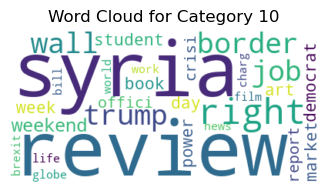

Words extracted for Category 11: ['trump', 'trade', 'brief', 'crisi', 'venezuela', 'hous', 'china', 'power', 'citi', 'shutdown', 'show', 'presid', 'talk', 'world', 'woman', 'week', 'art', 'york', 'war', 'way', 'tv', 'review', 'worker', 'govern', 'health', 'stori', 'place', 'brexit']


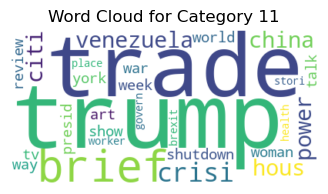

Words extracted for Category 12: ['trump', 'brexit', 'peopl', 'court', 'govern', 'plan', 'student', 'shutdown', 'right', 'school', 'time', 'film', 'job', 'day', 'week', 'charg', 'market', 'power', 'art', 'crisi', 'bill', 'globe', 'work', 'life', 'offici', 'venezuela', 'world', 'weekend', 'book']


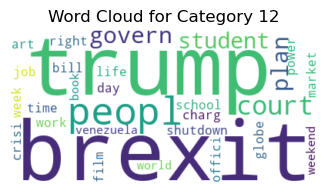

Words extracted for Category 13: ['week', 'state', 'work', 'case', 'court', 'trump', 'democrat', 'year', 'tv', 'globe', 'talk', 'syria', 'brief', 'crisi', 'child', 'right', 'day', 'market', 'power', 'art', 'protest', 'world', 'thing', 'film', 'immigr', 'life', 'woman', 'bill']


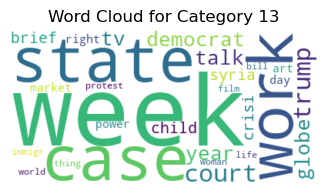

Words extracted for Category 14: ['presid', 'book', 'home', 'day', 'trump', 'world', 'wall', 'way', 'star', 'crisi', 'protest', 'right', 'tv', 'stori', 'war', 'death', 'word', 'report', 'attack', 'life', 'weekend', 'state', 'shutdown', 'brief', 'market', 'work', 'bill', 'art']


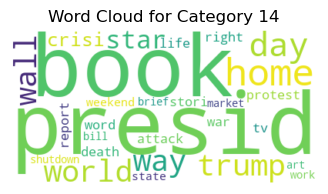

Words extracted for Category 15: ['winter', 'quiz', 'word', 'power', 'death', 'hous', 'china', 'democrat', 'trump', 'shutdown', 'film', 'home', 'woman', 'art', 'charg', 'crisi', 'right', 'market', 'bill', 'day', 'work', 'life', 'case', 'world', 'job', 'weekend', 'offici', 'globe', 'student']


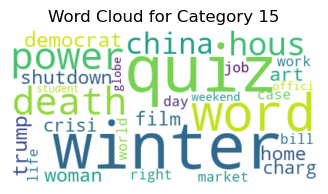

Words extracted for Category 16: ['book', 'trump', 'stori', 'tv', 'life', 'year', 'war', 'star', 'border', 'week', 'today', 'quiz', 'news', 'review', 'crisi', 'market', 'russia', 'globe', 'plan', 'teacher', 'govern', 'word', 'case', 'woman', 'china', 'way', 'charg', 'shutdown']


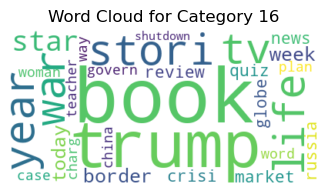

Words extracted for Category 17: ['oscar', 'news', 'child', 'war', 'week', 'trump', 'offici', 'john', 'quiz', 'shutdown', 'syria', 'health', 'york', 'polic', 'brief', 'even', 'citi', 'life', 'job', 'work', 'world', 'case', 'venezuela', 'bill', 'wall', 'weekend', 'charg', 'film', 'market']


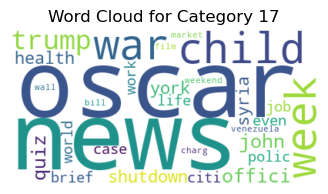

Words extracted for Category 18: ['tv', 'world', 'deal', 'life', 'trump', 'china', 'court', 'year', 'way', 'week', 'shutdown', 'syria', 'govern', 'wall', 'review', 'teacher', 'leader', 'war', 'student', 'school', 'film', 'worker', 'polic', 'book', 'show', 'power', 'right', 'art']


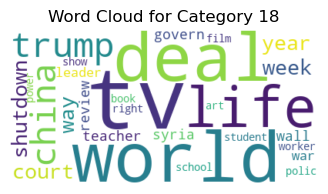

Words extracted for Category 19: ['time', 'citi', 'york', 'world', 'weekend', 'today', 'charg', 'trump', 'shutdown', 'globe', 'govern', 'state', 'day', 'market', 'right', 'student', 'case', 'week', 'power', 'life', 'crisi', 'bill', 'work', 'brexit', 'film', 'job', 'offici', 'art', 'book']


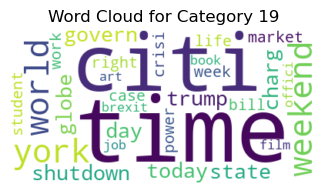

Words extracted for Category 20: ['trump', 'attack', 'year', 'health', 'quiz', 'man', 'offici', 'presid', 'winter', 'brief', 'word', 'right', 'news', 'court', 'offic', 'week', 'place', 'home', 'shutdown', 'state', 'china', 'bill', 'world', 'film', 'wall', 'life', 'job', 'art', 'globe']


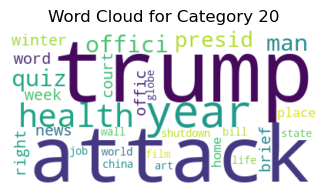

Words extracted for Category 21: ['offic', 'charg', 'art', 'star', 'day', 'deal', 'polic', 'death', 'offici', 'week', 'war', 'leader', 'brexit', 'right', 'globe', 'work', 'bill', 'life', 'world', 'film', 'crisi', 'job', 'power', 'weekend', 'market', 'immigr', 'shutdown', 'venezuela', 'student']


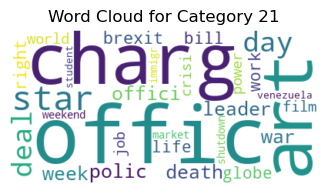

Words extracted for Category 22: ['today', 'woman', 'court', 'protest', 'trade', 'brief', 'famili', 'war', 'talk', 'citi', 'even', 'globe', 'trump', 'york', 'shutdown', 'week', 'china', 'govern', 'news', 'wall', 'place', 'case', 'immigr', 'day', 'democrat', 'polic', 'way', 'life', 'crisi']


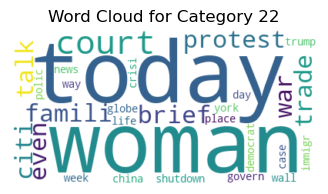

Words extracted for Category 23: ['talk', 'wall', 'border', 'hous', 'democrat', 'polic', 'stori', 'home', 'worker', 'right', 'report', 'day', 'market', 'power', 'art', 'crisi', 'bill', 'globe', 'work', 'life', 'world', 'film', 'job', 'weekend', 'offici', 'charg', 'student', 'book']


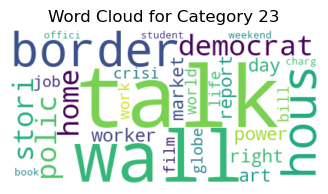

Words extracted for Category 24: ['die', 'man', 'place', 'york', 'offic', 'student', 'school', 'music', 'attack', 'globe', 'star', 'weekend', 'year', 'time', 'citi', 'thing', 'govern', 'report', 'presid', 'death', 'polic', 'bill', 'brief', 'quiz', 'tv', 'hous', 'democrat', 'news']


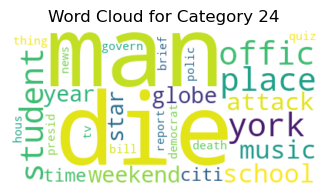

Words extracted for Category 25: ['review', 'school', 'power', 'report', 'tv', 'day', 'offic', 'brexit', 'art', 'place', 'deal', 'presid', 'child', 'today', 'offici', 'court', 'woman', 'case', 'job', 'work', 'wall', 'bill', 'globe', 'venezuela', 'life', 'film', 'crisi', 'weekend']


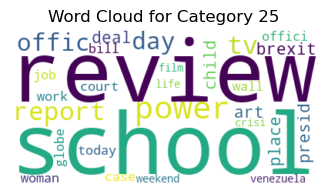

Words extracted for Category 26: ['trump', 'presid', 'court', 'case', 'review', 'school', 'charg', 'music', 'star', 'democrat', 'oscar', 'news', 'hous', 'today', 'art', 'book', 'state', 'time', 'die', 'show', 'leader', 'film', 'death', 'way', 'govern', 'shutdown', 'wall', 'john']


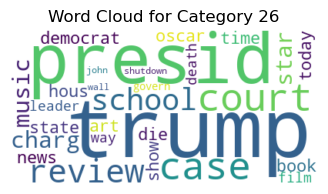

Words extracted for Category 27: ['worker', 'death', 'life', 'trump', 'year', 'famili', 'state', 'woman', 'review', 'job', 'market', 'citi', 'child', 'way', 'music', 'border', 'die', 'tv', 'crisi', 'art', 'power', 'work', 'world', 'film', 'day', 'court', 'bill', 'globe']


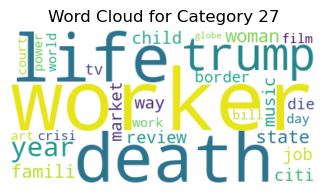

Words extracted for Category 28: ['govern', 'job', 'life', 'shutdown', 'brief', 'presid', 'peopl', 'hous', 'trump', 'even', 'review', 'week', 'work', 'art', 'crisi', 'bill', 'case', 'globe', 'day', 'venezuela', 'film', 'wall', 'weekend', 'offici', 'student', 'power', 'world', 'nyc']


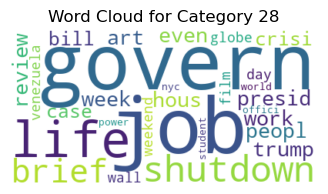

Words extracted for Category 29: ['case', 'woman', 'world', 'work', 'protest', 'thing', 'trump', 'power', 'peopl', 'time', 'state', 'hous', 'china', 'govern', 'york', 'day', 'market', 'charg', 'art', 'crisi', 'right', 'globe', 'child', 'life', 'film', 'job', 'weekend', 'immigr', 'bill', 'student']


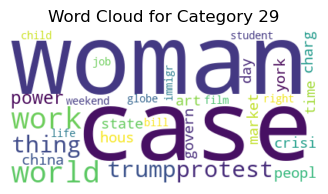

Words extracted for Category 30: ['shutdown', 'deal', 'brief', 'work', 'book', 'world', 'art', 'govern', 'teacher', 'peopl', 'brexit', 'china', 'presid', 'weekend', 'even', 'border', 'way', 'life', 'news', 'bill', 'globe', 'student', 'crisi', 'wall', 'job', 'offici', 'power', 'film']


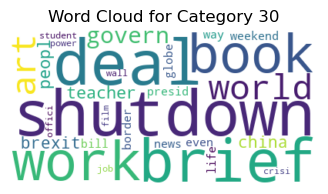

Words extracted for Category 31: ['york', 'famili', 'wall', 'music', 'offic', 'home', 'season', 'review', 'china', 'democrat', 'year', 'presid', 'film', 'die', 'trump', 'time', 'border', 'world', 'power', 'market', 'work', 'crisi', 'bill', 'globe', 'life', 'court', 'art', 'day']


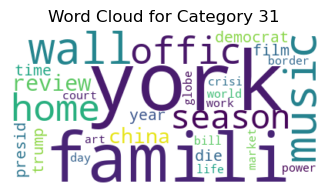

Words extracted for Category 32: ['wall', 'trump', 'news', 'john', 'student', 'quiz', 'week', 'day', 'woman', 'man', 'nyc', 'histori', 'right', 'teacher', 'polic', 'border', 'weekend', 'stori', 'film', 'tv', 'brexit', 'globe', 'work', 'world', 'art', 'crisi', 'life', 'job', 'health']


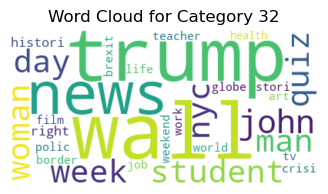

Words extracted for Category 33: ['tv', 'review', 'trump', 'season', 'work', 'year', 'histori', 'brexit', 'death', 'winter', 'shutdown', 'hous', 'woman', 'russia', 'die', 'talk', 'life', 'leader', 'show', 'health', 'charg', 'china', 'report', 'trade', 'john', 'job', 'student', 'power']


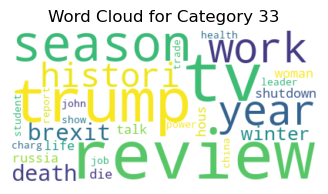

Words extracted for Category 34: ['trump', 'bill', 'immigr', 'hous', 'state', 'day', 'govern', 'child', 'wall', 'shutdown', 'stori', 'talk', 'man', 'worker', 'citi', 'show', 'tv', 'border', 'world', 'market', 'power', 'job', 'art', 'crisi', 'globe', 'work', 'life', 'film', 'right']


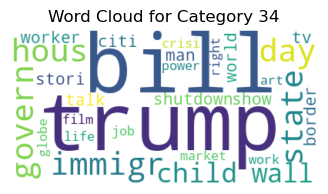

Words extracted for Category 35: ['home', 'woman', 'year', 'teacher', 'student', 'york', 'die', 'tv', 'court', 'art', 'life', 'show', 'trump', 'russia', 'way', 'citi', 'right', 'market', 'day', 'work', 'crisi', 'bill', 'globe', 'offici', 'world', 'film', 'job', 'power', 'child']


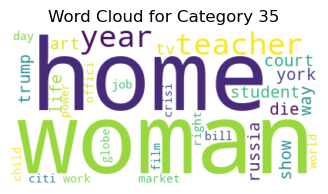

Words extracted for Category 36: ['border', 'trump', 'book', 'crisi', 'wall', 'govern', 'globe', 'york', 'time', 'worker', 'power', 'art', 'shutdown', 'bill', 'day', 'student', 'market', 'life', 'brexit', 'world', 'film', 'job', 'weekend', 'offici', 'charg', 'week', 'work', 'music']


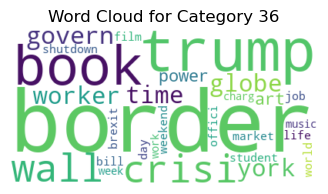

Words extracted for Category 37: ['russia', 'trump', 'immigr', 'attack', 'review', 'world', 'state', 'war', 'peopl', 'democrat', 'leader', 'charg', 'govern', 'brief', 'offic', 'brexit', 'wall', 'student', 'crisi', 'bill', 'case', 'power', 'film', 'venezuela', 'job', 'globe', 'work', 'life']


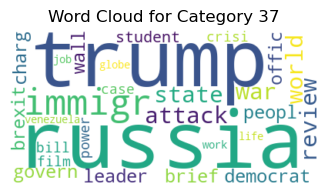

Words extracted for Category 38: ['leader', 'china', 'presid', 'peopl', 'thing', 'trump', 'woman', 'right', 'way', 'film', 'citi', 'power', 'brief', 'polic', 'art', 'day', 'child', 'market', 'globe', 'bill', 'even', 'work', 'life', 'world', 'job', 'deal', 'crisi', 'week']


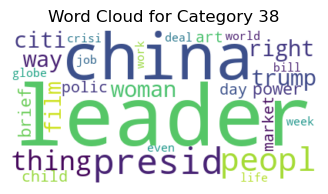

Words extracted for Category 39: ['show', 'stori', 'life', 'art', 'week', 'quiz', 'right', 'weekend', 'job', 'woman', 'york', 'word', 'nyc', 'court', 'state', 'worker', 'offic', 'leader', 'thing', 'time', 'health', 'peopl', 'news', 'brexit', 'work', 'crisi', 'bill', 'music']


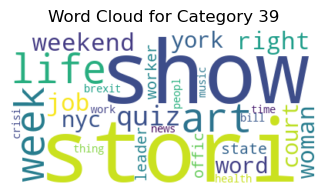

In [23]:
for category, keyword_string in headline_topics:
    words = []

    matches = re.findall(r'"\w+"', keyword_string)
    for match in matches:
        word = match.strip('"')
        words.append(word)

    text = ' '.join(words)

    if words:
        print(f"Words extracted for Category {category}: {words}")
        
        wordcloud = WordCloud(width=400, height=200, background_color='white').generate(text)
        plt.figure(figsize=(4, 2)) 
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Word Cloud for Category {category}')
        plt.axis('off')
        plt.show()
    else:
        print(f"No words extracted for Category {category}.")


#### Preparing the data for use in Claster models

In [24]:
#First of all we will insert columns tf- idf

In [25]:
data['Main Keywords lead paragraph (tf- idf)'] = data['lead paragraph'].apply(preprocess_text)
data['Main Keywords abstract (tf- idf)'] = data['abstract'].apply(preprocess_text)
data['Main Keywords headline (tf- idf)'] = data['headline'].apply(preprocess_text)

In [26]:
#We would also like to check both the common keywords and whether it is possible to summarize a paragraph/extract the main idea from a paragraph

In [27]:
lemmatizer = WordNetLemmatizer()

def extracting_frequent_text(text):
    words = re.findall(r'\b\w+\b', text.lower())
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word not in stop_words]
    lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
    word_freq = Counter(lemmatized_words)
    frequent_words = word_freq.most_common(3)
    frequent = ', '.join([word[0] for word in frequent_words])
    return frequent 


data['abstract keywords'] = data['abstract'].apply(extracting_frequent_text)
data['lead paragraph keywords'] = data['lead paragraph'].apply(extracting_frequent_text)
data['headline keywords'] = data['headline'].apply(extracting_frequent_text)

In [28]:
def summarize_paragraph(paragraph):
    summary = summa_summarize(paragraph)
    return summary

def summarize_paragraph1(paragraph):
    # Adjust the 'ratio' parameter to control the length of the summary (default: 0.2)
    # Adjust the 'split' parameter to control how sentences are split (default: True)
    summary = summa_summarize(paragraph, ratio=0.5, split=True)
    return summary

data['lead paragraph sum'] = data['lead paragraph'].apply(summarize_paragraph1)

In [29]:
data

headline  \
0                        1919: The Year of the Crack-Up   
1                         In Search of Lost Screen Time   
2     Warren Wells, Star Receiver With a Derailed Ca...   
3                          2019: The Year of the Wolves   
4                        Why Trump Reigns as King Cyrus   
...                                                 ...   
3916  As Trump Demands His Wall, Lawmakers Plead for...   
3917  U.S. Appears to Soften Timing for List of Nort...   
3918  Dusan Makavejev, 86. Eyebrow-Raising Serbian D...   
3919  A Year Into the Overlooked Project, Widening t...   
3920        The Alarming Allure of Australia’s Brumbies   

                                               abstract  \
0     From the Treaty of Versailles to Prohibition, ...   
1     Imagine what we could do with our money, and h...   
2     Wells was a deep threat for the vaunted Oaklan...   
3         Can the Constitution withstand the partisans?   
4     The Christian right doesn’t like the president...   
...                                                 ...   
3916  Lawmakers reacted with concern and bewildermen...   
3917  A top diplomat said the Trump administration m...   
3918  His films, among them “WR: Mysteries of the Or...   
3919  In the past year, The Times published obituari...   
3920  The environment is being sacrificed for a nati...   

                                         lead paragraph  \
0     Throughout 2019, The New York Times Opinion se...   
1     More than three-quarters of all Americans own ...   
2     Warren Wells, a former wide receiver who becam...   
3     In Willa Cather’s novel “My Antonia,” there ar...   
4     The month before the 2018 midterms, a thousand...   
...                                                 ...   
3916  WASHINGTON — President Trump proclaimed on Thu...   
3917  WASHINGTON — A top American diplomat signaled ...   
3918  Dusan Makavejev, a Serbian director whose movi...   
3919  Times Insider explains who we are and what we ...   
3920  SYDNEY, Australia — Since this country’s found...   

                              first keyword  \
0     United States Politics and Government   
1                               Smartphones   
2                 Wells, Warren (1942-2018)   
3                           Trump, Donald J   
4     United States Politics and Government   
...                                     ...   
3916                        Border Barriers   
3917  United States International Relations   
3918                       Makavejev, Dusan   
3919                        Women and Girls   
3920                       Invasive Species   

                                               keywords   section name  \
0     ['United States Politics and Government', 'New...        Opinion   
1                       ['Smartphones', 'Social Media']        Opinion   
2     ['Wells, Warren (1942-2018)', 'Football', 'Dea...     Obituaries   
3     ['Trump, Donald J', 'United States Politics an...        Opinion   
4     ['United States Politics and Government', 'Bib...        Opinion   
...                                                 ...            ...   
3916  ['Border Barriers', 'Trump, Donald J', 'United...           U.S.   
3917  ['United States International Relations', 'ARM...          World   
3918  ['Makavejev, Dusan', 'Deaths (Obituaries)', 'M...     Obituaries   
3919  ['Women and Girls', 'Race and Ethnicity', 'Gor...  Reader Center   
3920        ['Invasive Species', 'Horses', 'Australia']        Opinion   

                                                   Text  \
0     [state, polit, govern, year, leagu, nation, eu...   
1                                   [smartphon, medium]   
2     [well, footbal, death, obituari, raider, footb...   
3     [trump, donald, j, state, polit, govern, const...   
4     [state, polit, govern, movement, liberti, univ...   
...                                                 ...   
3916  [border, barrier, j, state, polit, govern, shu.

In [37]:
#You can see lead paragraph sum column: in most cases we will get an empty value because the paragraph is too short.
#We tried to solve the problem by adding properties for the Length of the summary and the way sentences are divided but we get an error.
#We also tried to extract the main topic by using LDA, we received an error that the paragraph is too short, so we did not include the results in the data.

In [36]:
data_after_nlp = data[["headline","abstract","lead paragraph","first keyword","lead paragraph keywords","Main Keywords lead paragraph (tf- idf)","abstract keywords", "Main Keywords abstract (tf- idf)","headline keywords","Main Keywords headline (tf- idf)"]]
data_after_nlp.to_csv('data after nlp.csv', encoding='utf-8-sig', index=False)